<a href="https://colab.research.google.com/github/Code-tanisha/UPgrad-Python-Data-science-/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SIMPLE LINEAR REGESSION**

1. Reading and understanding the data

2. Training

3. Residual Analysis (this we do only in linear regression)

4. predicting and evaluating the model on test set


## STEP1: READING AND UNDERSTNADING THE DATA

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [4]:
df = pd.read_csv('advertising.csv')
df.head()

# Here sales column is our target variable and the 1st 3 columns are predictive variables

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**1. Our goal is to built a regression model using 3 variables TV, Radio, Newspaper that will predict the sales.**


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


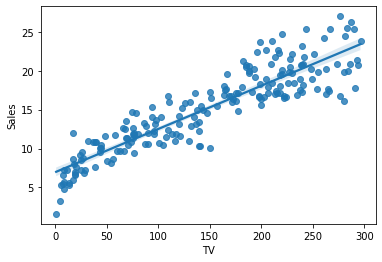

In [8]:
# Visualise the data set
# When we are doing any regression we can use scatterplots because they show a positive sort od trend between the target variable and the predictive variable.
# Seaborn comes with the regplot that is the regression plot

sns.regplot(x='TV', y="Sales", data=df)

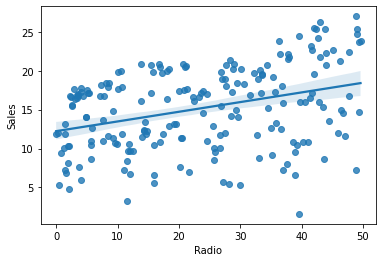

In [9]:
sns.regplot(x='Radio', y="Sales", data=df)

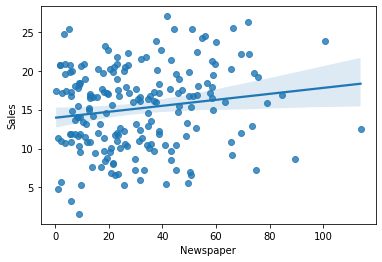

In [10]:
sns.regplot(x='Newspaper', y="Sales", data=df)

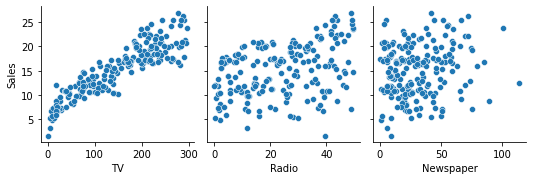

In [11]:
# Now we will compare these plots using pairplots

sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


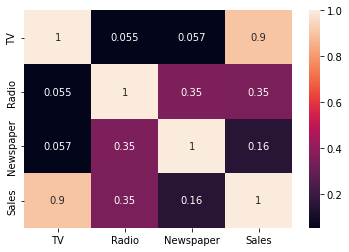

In [13]:
# There is another way to visualize the relation between some variables is heatmap
sns.heatmap(df.corr(), annot=True)

## STEP2: Performing simple Linear Regression

y = c + m1x1 + m2x2+ ...mNxN

y is the response rate

c is the intercept

m1 is the coefficient of the 1st feature

mN is the coefficient of the nth feature

In our case - y =  c + m1 * TV
, Where m values are called the model coefficients or the model parameters

### Steps for modeling

- Create X and y where X is the predictive variables and y is the target

- Create train and test sets(70-30, 80-20)

- Train the model on the training set

- Evaluate the model (Training set, test set)


In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
# Create X and y

X = df['TV']
y = df['Sales']

In [16]:
# Do a train- test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state = 100)
X_test.shape
X_train.shape

(140,)

In [17]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
# training a model
# Linear regression eq is y = mx + c but by default the stats module library does not includes constant(c). so we manually have to add it 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


 y = c + m1. X1

 y = c.const + m1.TV

In [19]:
# Fitting the model
# below OLS means ordinary least squares
lr = sm.OLS(y_train, X_train_sm)  # here we have just created linear regression object lr
lr_model = lr.fit()
lr_model.params


const    6.948683
TV       0.054546
dtype: float64

Above means Sales = 6.94 + 0.05*TV

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.52e-52
Time:                        17:46:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What we have checked from above summary is

The coef and the p-value

The R squared value is 81.6 which is very high

p(F-statistic) is low => the fit is not by chance

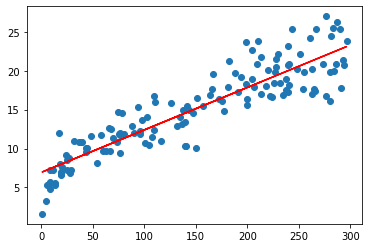

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.0545*X_train, 'r')
plt.show()

### ** Step 3: Residual analysis**

We are interested in looking at the error terms and we do this on the training set.

 error = f(y_train, y_train_pred)

In [24]:
# now we are giving the training set and want the predicted values of y 

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [25]:
# Residual analysis

res = y_train - y_train_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Plot')

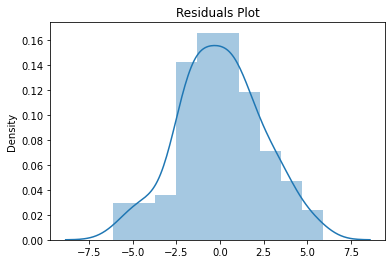

In [26]:
# Plot the residuals

plt.figure()
sns.distplot(res)
plt.title('Residuals Plot')


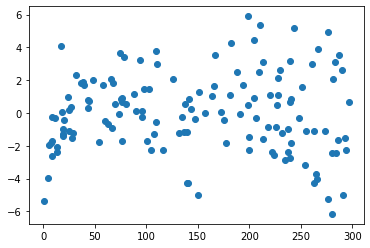

In [27]:
# Look for patterns in the residuals (we should not be abe to identify any patterns)

plt.scatter(X_train, res)
plt.show()

# With the below plot we can say that the residuals are normally distributed and we can not see any sort of solid pattern below

### STEP4: **Prediction and Evaluation on the test set**

We will use our train model to make predictions on the test set (y_test_pred)

then evaluate the model using r-square on the test

In [28]:
# before proceeding we need to add a constant/variable to the test set(X_test)
X_test_sm = sm.add_constant(X_train)

# Firsr we will use our train model to make predictions on the test set (y_test_pred)
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [29]:
# Evaluate the model- r squared on test set
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

ValueError: ignored

In [30]:
# r2 on train set
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
r2

0.8157933136480389

the test set gives r2 of 79 and train gives as 81 so any thing with in the 5% od train shows good stability . means 79 is within 5% of 81 so we can conclude what the model has learnt on the training set it is able to generalize on the test set.

In [31]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    
  

**Lets Visualise the predictions on the test set**

ValueError: ignored

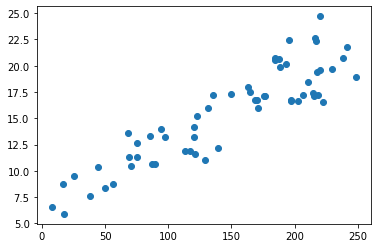

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### **Linear Regression Using Sklearn**

In [33]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state = 100)

**Steps in sklearn model building**


In [34]:
from sklearn.linear_model import LinearRegression

In [38]:
X_train.shape

(140,)

In [41]:
# Reshaping the values of X_train to (n,1)
X_train_lm = X_train.values.reshape(-1, 1)
X_train_lm.shape
X_test_lm = X_test.values.reshape(-1, 1)

In [40]:
# 1. Create an object of Linear Regression
lm = LinearRegression()

# 2. Fit the model
lm.fit(X_train_lm, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# 3. See parameters, make predictions (on train set, test set)
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.948683200001357


In [48]:

# prediction on test set
y_test_pred = lm.predict(X_test_lm)
# Prediction on X set
X_test_pred = lm.predict(X_train_lm)


In [51]:
# 4. Evaluate (r2, etc.)

print(r2_score(y_true=y_train, y_pred=y_train_pred))  # R2 on the training set
print(r2_score(y_true=y_test, y_pred=y_test_pred))    # R2 on the test set


0.8157933136480389
0.7921031601245662
